In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

**Directory**

In [ ]:
folder = '/content/drive/MyDrive/indian_currency/training/'

**Plot 10 Rupee Notes**


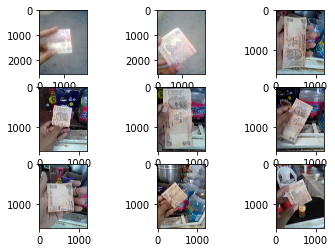

In [ ]:
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder +'10/10__' + str(i) + '.jpg'
    #load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

**Plot 100 Rupee Notes**

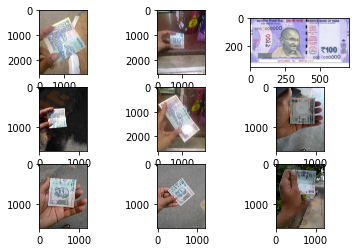

In [ ]:
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder +'100/100__' + str(i) + '.jpg'
    #load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

**Resize Training Dataset to 224x224 size images**

In [ ]:
from os import listdir
from os import walk
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img

folder =  '/content/drive/MyDrive/indian_currency/training/'
for dir in listdir(folder):
  dir = folder+dir+'/'
  for file in listdir(dir):
    photo = load_img(dir + file, target_size=(224,224))
    save_img(dir+file,photo)

**Resize Training Dataset to 224x224 size images**

In [ ]:
from os import listdir
from os import walk
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img

folder =  '/content/drive/MyDrive/indian_currency/validation/'
for dir in listdir(folder):
  dir = folder+dir+'/'
  for file in listdir(dir):
    photo = load_img(dir + file, target_size=(224,224))
    save_img(dir+file,photo)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


#**Develop a Baseline CNN Model**

**One Block GVV Model**

Found 4050 images belonging to 8 classes.
Found 653 images belonging to 8 classes.
> 86.830


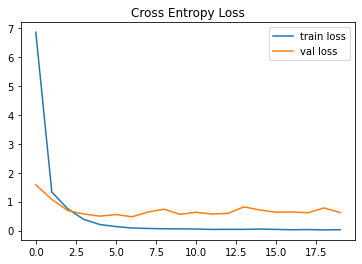

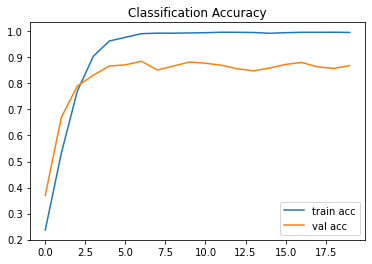

In [ ]:
# baseline model for the currency dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # convolution to 32bit matrix
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())        # convert the 2D matrix to 1D array
    model.add(Dense(128, activation='relu'))
    model.add(Dense(8, activation='softmax'))  # we have 7 types of notes
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG1_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG1_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    test_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/validation/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

**Two Block CNN Model**

Found 4050 images belonging to 8 classes.
Found 653 images belonging to 8 classes.
> 87.443


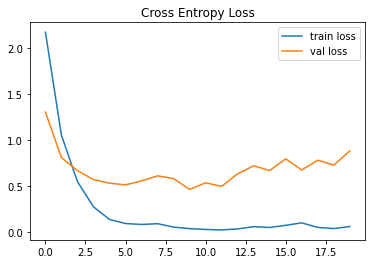

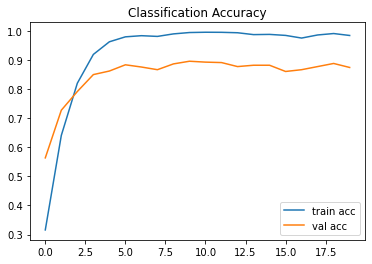

In [ ]:
# baseline model for the currency dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(8, activation='softmax'))  # we have 7 types of notes
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG2_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG2_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    test_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/validation/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

**Three Block VGG Model**

Found 4050 images belonging to 8 classes.
Found 653 images belonging to 8 classes.
> 90.505


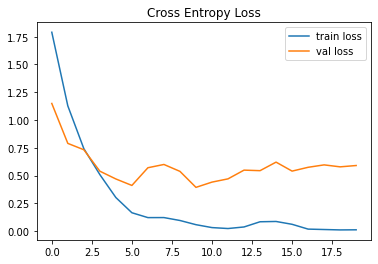

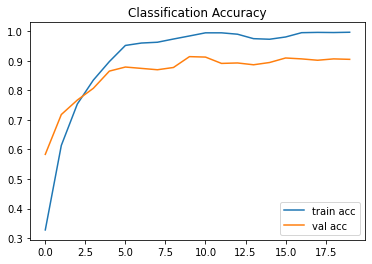

In [ ]:
# baseline model for the currency dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(8, activation='softmax'))  # we have 7 types of notes
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG3_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG3_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    test_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/validation/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

**Dropout Regularization**

Found 4050 images belonging to 8 classes.
Found 653 images belonging to 8 classes.
> 91.118


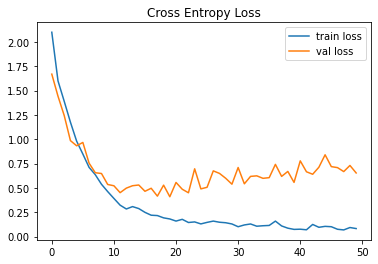

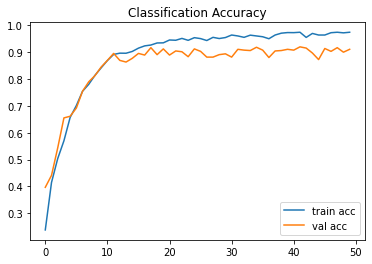

In [ ]:
# baseline model for the currency dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dropout
from keras.optimizers import SGD
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2)) # Dropout
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2)) # Dropout
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2)) # Dropout
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2)) # Dropout
    model.add(Dense(8, activation='softmax'))  # we have 7 types of notes
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG3_DropOut_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG3_DropOut_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    test_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/validation/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

**Image Data Augmentation**

Found 4050 images belonging to 8 classes.
Found 653 images belonging to 8 classes.
> 93.415


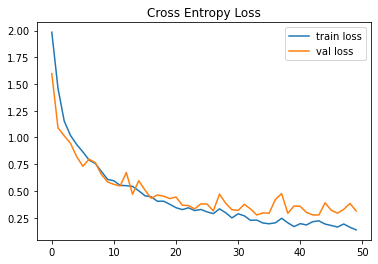

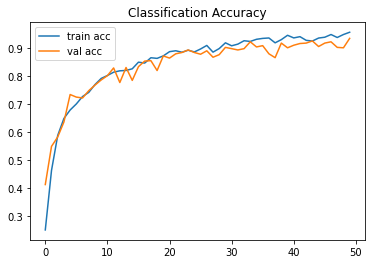

In [ ]:
# baseline model for the currency dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dropout
from keras.optimizers import SGD
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(8, activation='softmax'))  # we have 7 types of notes
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG3_Augmentation_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG3_Augmentation_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    test_it = test_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/validation/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

**VGG16**

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(8, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    test_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/validation/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
    print('> %.3f' % (acc * 100.0))
    # save the model
    model.save('currency_final_new_model.h5')
    model.save('/content/drive/MyDrive/indian_currency_notes/new_currency_backg_final_model.h5')
 
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

58892288/58889256 [==============================] - 0s 0us/step
Found 4042 images belonging to 8 classes.
Found 653 images belonging to 8 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
127/127 [==============================] - 2351s 18s/step - loss: 9.2430 - accuracy: 0.3600 - val_loss: 1.3218 - val_accuracy: 0.5100
Epoch 2/50
127/127 [==============================] - 2316s 18s/step - loss: 1.1904 - accuracy: 0.5605 - val_loss: 1.2501 - val_accuracy: 0.5911
Epoch 3/50
127/127 [==============================] - 2315s 18s/step - loss: 0.9708 - accuracy: 0.6664 - val_loss: 1.0801 - val_accuracy: 0.6983
Epoch 4/50
127/127 [==============================] - 2318s 18s/step - loss: 0.7112 - accuracy: 0.7608 - val_loss: 1.0894 - val_accuracy: 0.7289
Epoch 5/50
127/127 [==============================] - 2316s 18s/step - loss: 0.6210 - accuracy: 0.7887 - val_loss: 0.9757 - val_accuracy: 0.7489
Epoch 6/50
127/127 [==============================] - 2331s 18s/step - loss: 0.4720 - accuracy: 0.8293 - val_loss: 0.9314 - val_accuracy: 0.8040
Epoch 7/50
127/127 [==============================] - 2327s 18s/step - loss: 0.4354 - accuracy: 0.8633 - val_loss: 0.9130 - val_ac

In [ ]:
# save the final model to file
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(7, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	# opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model
  
# run the test harness for evaluating a model
def run_test_harness():
  # define model
  model = define_model()
  # create data generator
  datagen = ImageDataGenerator(featurewise_center=True)
  # specify imagenet mean values for centering
  datagen.mean = [123.68, 116.779, 103.939]
  # prepare iterator
  train_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_notes/training/',
    class_mode='categorical', batch_size=32, target_size=(224, 224))
  # fit model
  model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=50, verbose=0)
  # save model
  model.save('currency_final_model.h5')
  model.save('/content/drive/MyDrive/indian_currency_notes/currency_final_model.h5')
 
# entry point, run the test harness
run_test_harness()

Found 592 images belonging to 7 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


**MobileNet V2**

9412608/9406464 [==============================] - 0s 0us/step
Found 3698 images belonging to 7 classes.
Found 315 images belonging to 7 classes.
> 72.381


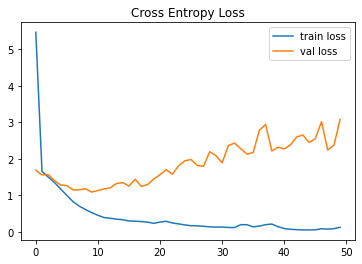

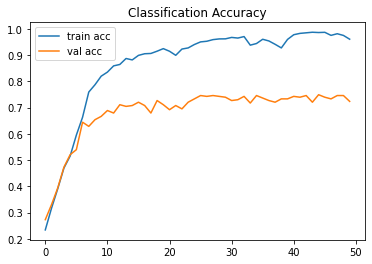

In [ ]:
# MobileNet model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    # load model
    model = MobileNetV2(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(7, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    test_it = datagen.flow_from_directory('/content/drive/MyDrive/indian_currency/validation/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # save the model
    model.save('mobilenet_currency_final_model.h5')
    model.save('/content/drive/MyDrive/indian_currency_notes/mobilenet_currency_model.h5')
 
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

In [ ]:
# MobileNet model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    # load model
    model = MobileNetV2(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(8, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
# create data generator
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    test_it = test_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency/validation/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # save the model
    model.save('mobilenet_currency_final_model.h5')
    model.save('/content/drive/MyDrive/indian_currency_notes/mobilenet_currency_model_new_backg.h5')
 
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

9412608/9406464 [==============================] - 0s 0us/step
Found 4050 images belonging to 8 classes.
Found 653 images belonging to 8 classes.
Epoch 1/50
127/127 [==============================] - 917s 7s/step - loss: 6.9383 - accuracy: 0.2872 - val_loss: 1.5746 - val_accuracy: 0.3507
Epoch 2/50
127/127 [==============================] - 215s 2s/step - loss: 1.4170 - accuracy: 0.4556 - val_loss: 1.4056 - val_accuracy: 0.5023
Epoch 3/50
127/127 [==============================] - 214s 2s/step - loss: 1.2597 - accuracy: 0.5376 - val_loss: 1.1736 - val_accuracy: 0.5605
Epoch 4/50
127/127 [==============================] - 213s 2s/step - loss: 1.1229 - accuracy: 0.5874 - val_loss: 1.2611 - val_accuracy: 0.6018
Epoch 5/50
127/127 [==============================] - 210s 2s/step - loss: 0.9265 - accuracy: 0.6989 - val_loss: 1.0212 - val_accuracy: 0.6830
Epoch 6/50
127/127 [==============================] - 209s 2s/step - loss: 0.6741 - accuracy: 0.7635 - val_loss: 0.8492 - val_accuracy: 0.6

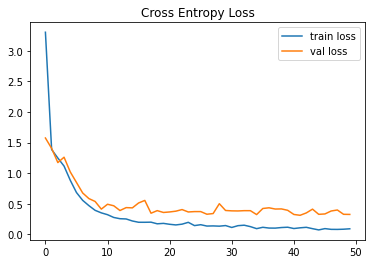

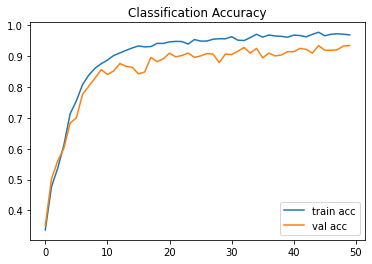

In [ ]:
# MobileNet model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    # load model
    model = MobileNetV2(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(8, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
# create data generator
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    test_it = test_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/validation/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
    print('> %.3f' % (acc * 100.0))
    # save the model
    model.save('mobilenet_currency_final_model.h5')
    model.save('/content/drive/MyDrive/indian_currency_notes/mobilenet_currency_model_new_backg.h5')
 
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

**epochs 100**

Found 4042 images belonging to 8 classes.
Found 653 images belonging to 8 classes.
Epoch 1/100
127/127 [==============================] - 842s 7s/step - loss: 5.2112 - accuracy: 0.3434 - val_loss: 1.1788 - val_accuracy: 0.5023
Epoch 2/100
127/127 [==============================] - 216s 2s/step - loss: 1.0514 - accuracy: 0.5931 - val_loss: 0.9789 - val_accuracy: 0.6187
Epoch 3/100
127/127 [==============================] - 217s 2s/step - loss: 0.7864 - accuracy: 0.7156 - val_loss: 0.7656 - val_accuracy: 0.7274
Epoch 4/100
127/127 [==============================] - 218s 2s/step - loss: 0.6302 - accuracy: 0.7654 - val_loss: 0.5443 - val_accuracy: 0.8086
Epoch 5/100
127/127 [==============================] - 218s 2s/step - loss: 0.5129 - accuracy: 0.8234 - val_loss: 0.5758 - val_accuracy: 0.8147
Epoch 6/100
127/127 [==============================] - 217s 2s/step - loss: 0.4282 - accuracy: 0.8471 - val_loss: 0.5592 - val_accuracy: 0.8285
Epoch 7/100
127/127 [==============================] 

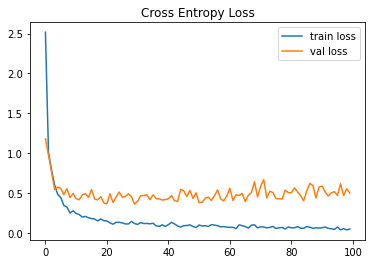

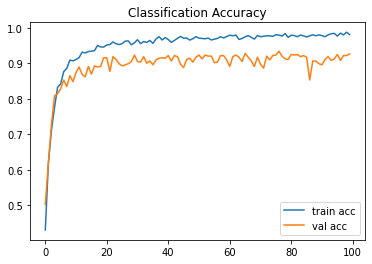

In [ ]:
# MobileNet model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    # load model
    model = MobileNetV2(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(8, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
# create data generator
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    test_it = test_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/validation/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=100, verbose=1)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
    print('> %.3f' % (acc * 100.0))
    # save the model
    model.save('mobilenet_currency_final_model_new.h5')
    model.save('/content/drive/MyDrive/indian_currency_notes/mobilenet_currency_model_new_new_backg.h5')
 
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

In [ ]:
# running
# MobileNet model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input 

 
# define cnn model
def define_model():
    # load model
    model = MobileNetV2(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(8, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
# create data generator
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    test_it = test_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/validation/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
    print('> %.3f' % (acc * 100.0))
    # save the model
    model.save('mobilenet_currency_final_model.h5')
    model.save('/content/drive/MyDrive/indian_currency_notes/mobilenet_currency_model_new_3_backg.h5')
 
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 4042 images belonging to 8 classes.
Found 653 images belonging to 8 classes.
Epoch 1/50
127/127 [==============================] - 294s 2s/step - loss: 5.6843 - accuracy: 0.4221 - val_loss: 0.9283 - val_accuracy: 0.7182
Epoch 2/50
127/127 [==============================] - 209s 2s/step - loss: 0.7273 - accuracy: 0.7655 - val_loss: 0.7253 - val_accuracy: 0.7933
Epoch 3/50
127/127 [==============================] - 248s 2s/step - loss: 0.5331 - accuracy: 0.8248 - val_loss: 0.5175 - val_accuracy: 0.8361
Epoch 4/50
127/127 [==============================] - 232s 2s/step - loss: 0.3447 - accuracy: 0.8880 - val_loss: 0.4785 - val_accuracy: 0.8821
Epoch 5/50
127/127 [==============================] - 224s 2s/step - loss: 0.3253 - accuracy: 0.8918 - val_loss: 0.4872 - val_accuracy: 0.8668
Epoch 6/50
127/127 [==============================] - 213s 2s/step - loss: 0.2685 - accuracy: 0.9112 - val_loss: 0.4526 - val_accuracy: 0.8744
Epoch 7/50
127/127 [==============================] - 223s 

**Pre trained**

9412608/9406464 [==============================] - 0s 0us/step
Found 4042 images belonging to 8 classes.
Epoch 1/100
127/127 [==============================] - 1106s 9s/step - loss: 5.8406 - accuracy: 0.3570
Epoch 2/100
127/127 [==============================] - 173s 1s/step - loss: 0.8660 - accuracy: 0.6865
Epoch 3/100
127/127 [==============================] - 172s 1s/step - loss: 0.5611 - accuracy: 0.8094
Epoch 4/100
127/127 [==============================] - 172s 1s/step - loss: 0.4320 - accuracy: 0.8515
Epoch 5/100
127/127 [==============================] - 171s 1s/step - loss: 0.3581 - accuracy: 0.8750
Epoch 6/100
127/127 [==============================] - 170s 1s/step - loss: 0.2958 - accuracy: 0.9091
Epoch 7/100
127/127 [==============================] - 171s 1s/step - loss: 0.2990 - accuracy: 0.8993
Epoch 8/100
127/127 [==============================] - 170s 1s/step - loss: 0.2527 - accuracy: 0.9239
Epoch 9/100
127/127 [==============================] - 170s 1s/step - loss: 0.

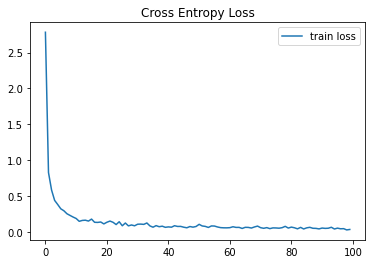

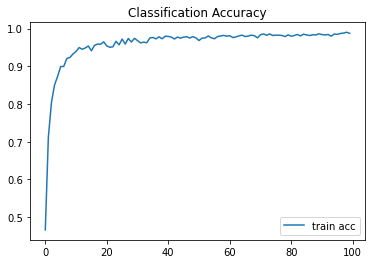

In [ ]:
# all photo net detected
# MobileNet model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    # load model
    model = MobileNetV2(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(8, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  #pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  #pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
# create data generator
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    #test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224))
    #test_it = test_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/validation/',
     #   class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),epochs=100, verbose=1)
    # evaluate model
    #_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
    #print('> %.3f' % (acc * 100.0))
    # save the model
    model.save('mobilenet_currency_final_model_new_new.h5')
    model.save('/content/drive/MyDrive/indian_currency_notes/mobilenet_currency_model_new_new_new_backg.h5')
 
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

**Mobilenet final**

In [ ]:
# Not working on mobile phone Stack error
# MobileNet model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications import MobileNet
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dense,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input 
# define cnn model
def define_model():
    # load model
    base_model = MobileNet(weights='imagenet', include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
    x=Dense(1024,activation='relu')(x) #dense layer 2
    x=Dense(512,activation='relu')(x) #dense layer 3
    preds=Dense(8,activation='softmax')(x) #final layer with softmax activation
    model=Model(inputs=base_model.input,outputs=preds)
    for i,layer in enumerate(model.layers):
      print(i,layer.name)
    for layer in model.layers:
      layer.trainable=False # or if we want to set the first 20 layers of the network to be non-trainable
    for layer in model.layers[:20]:
      layer.trainable=False
    for layer in model.layers[20:]:
      layer.trainable=True
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot the loss
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], label='train loss')
  #pyplot.plot(history.history['val_loss'], label='val loss')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_loss.png')
 
  # plot the accuracy
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], label='train acc')
  #pyplot.plot(history.history['val_accuracy'], label='val acc')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig('/content/drive/MyDrive/indian_currency_notes/VGG16_acc.png')
  
  pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
# create data generator
    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    #test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/training/',
        class_mode='categorical', batch_size=32, target_size=(224, 224), color_mode='rgb', shuffle=True)
    #test_it = test_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/validation/',
     #   class_mode='categorical', batch_size=32, target_size=(224, 224))
    # fit model
    step_size_train=train_it.n//train_it.batch_size
    history = model.fit(train_it, steps_per_epoch=len(train_it),epochs=10, verbose=1)
    # evaluate model
    #_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
    #print('> %.3f' % (acc * 100.0))
    # save the model
    model.save('mobilenet_currency_final_model_new_new.h5')
    model.save('/content/drive/MyDrive/indian_currency_notes/mobilenet_currency_model_new_new_new_new_backg.h5')
 
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

0 input_8
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

KeyboardInterrupt: ignored

In [ ]:
# not working on mobile phone
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNetV2
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
base_model=MobileNetV2(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(8,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)
for i,layer in enumerate(model.layers):
  print(i,layer.name)
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/indian_currency_final/indian_currency/training/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit(train_generator, steps_per_epoch=len(train_generator),epochs=10, verbose=1)
model.save('/content/drive/MyDrive/indian_currency_notes/mobilenet_currency_model_new_new_new_new_new_backg.h5')
 

9412608/9406464 [==============================] - 0s 0us/step
0 input_1
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 

**Convert to Tflite**

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/indian_currency_notes/mobilenet_currency_model_new_new_new_new_new_backg.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("/content/drive/MyDrive/indian_currency_notes/mobilenet_currency_model_new_new_new_new_new_backg.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpusgn70zb/assets


INFO:tensorflow:Assets written to: /tmp/tmpusgn70zb/assets


20420632

**Make Prediction**

[[1.3426871e-03 6.0234561e-07 1.5548566e-04 1.6420184e-07 2.4761198e-07
  3.1451646e-02 6.9405537e-06 9.6704227e-01]]
not found


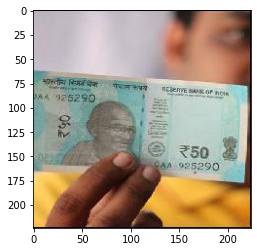

In [ ]:
# make a prediction for a new image.
import numpy as np
from matplotlib import pyplot
from matplotlib.image import imread
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img
def plot_img(img):
  #pyplot.subplot(630 + 1)
  #load image pixels
  image = imread(img)
  # plot raw pixel data
  pyplot.imshow(image)
# load an image and predict the class
def run_example():
  image = '/content/drive/MyDrive/indian_currency_notes/validation/50/0.jpg'
  plot_img(image)
  # load the image
  img = load_image(image)
  model = load_model('/content/drive/MyDrive/indian_currency_notes/mobilenet_currency_model_new_new_new_new_new_backg.h5')
  # predict the class
  pred = model.predict(img)
  print(pred)
  result = np.argmax(pred,axis=1)
  if( result == 0 ):
    print("10 rupee note")
  elif( result == 1):
    print("100 rupee note")
  elif( result == 2):
    print("20 rupee note")
  elif( result == 3):
    print("200 rupee note")
  elif( result == 4):
    print("2000 rupee note")
  elif( result == 5):
    print("50 rupee note")
  elif( result == 6):
    print("500 rupee note")
  else:
    print("not found")
# entry point, run the example
run_example()

**Make predection for MobileNet**

show


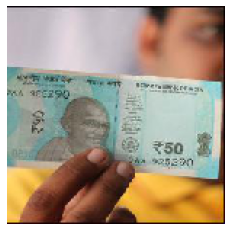

ValueError: ignored

In [ ]:
from IPython.display import Image
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from matplotlib import pyplot
import numpy as np
def new_load_image(img_path, show=False):
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = img_to_array(img)                    # (height, width, channels)
  img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
  img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
  print("show")
  pyplot.imshow(img_tensor[0])                           
  pyplot.axis('off')
  pyplot.show()
  return img_tensor
  
#img_path = 'C:/Users/Ferhat/Python Code/Workshop/Tensoorflow transfer learning/blue_tit.jpg'
img_path = '/content/drive/MyDrive/indian_currency_notes/validation/50/0.jpg'
new_image = new_load_image(img_path)
model = load_model('/content/drive/MyDrive/indian_currency_notes/mobilenet_currency_model_new_new_new_backg.h5')  
pred = model.predict(new_image)
